<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [ ]:
import pandas as pd

data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [15]:
import pandas as pd

# Загружаем данные
data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

# Выводим первые 5 строк таблицы
print("Первые 5 строк таблицы:")
print(data.head(5))


Первые 5 строк таблицы:
                                   Пол, возраст           ЗП  \
0    Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
1     Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2  Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3      Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4     Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   

                           Ищет работу на должность:  \
0                            Системный администратор   
1                               Технический писатель   
2                                           Оператор   
3  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                  Региональный менеджер по продажам   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   
2  Тверь , не готова к переезду , не готова к ком...   
3  Саратов , не готов к переез

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [13]:
import pandas as pd

# Загружаем данные
data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

# Выводим информацию о структуре таблицы
print("Информация о таблице:")
print(data.info())

Информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(

4. Обратите внимание на информацию о числе непустых значений.

In [16]:
import pandas as pd

# Загружаем данные
data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

# Подсчитываем количество непустых значений в каждом столбце
non_null_counts = data.notnull().sum()

# Выводим результаты
print("Количество непустых значений в каждом столбце:")
print(non_null_counts)

Количество непустых значений в каждом столбце:
Пол, возраст                       44744
ЗП                                 44744
Ищет работу на должность:          44744
Город, переезд, командировки       44744
Занятость                          44744
График                             44744
Опыт работы                        44576
Последнее/нынешнее место работы    44743
Последняя/нынешняя должность       44742
Образование и ВУЗ                  44744
Обновление резюме                  44744
Авто                               44744
dtype: int64


5. Выведите основную статистическую информацию о столбцах.


In [17]:
import pandas as pd

# Загружаем данные
data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

# Выводим основную статистическую информацию о столбцах
statistics = data.describe(include='all')

print("Основная статистическая информация о столбцах:")
print(statistics)

Основная статистическая информация о столбцах:
                                         Пол, возраст          ЗП  \
count                                           44744       44744   
unique                                          16003         690   
top     Мужчина ,  32 года , родился 17 сентября 1986  50000 руб.   
freq                                               18        4064   

       Ищет работу на должность:  \
count                      44744   
unique                     14929   
top      Системный администратор   
freq                        3099   

                             Город, переезд, командировки         Занятость  \
count                                               44744             44744   
unique                                              10063                38   
top     Москва , не готов к переезду , не готов к кома...  полная занятость   
freq                                                 1261             30026   

             График           

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [1]:
import pandas as pd

# Загрузка данных
data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

# Функция для определения категории образования
def categorize_education(education_str):
    # Разделяем строку на слова
    words = education_str.split()
    
    # Проверяем первые три слова
    if len(words) >= 3:
        if words[0] == 'Высшее':
            return 'высшее'
        elif words[0] == 'Неоконченное' and words[1] == 'высшее':
            return 'неоконченное высшее'
        elif words[0] == 'Среднее' and words[1] == 'специальное':
            return 'среднее специальное'
        elif words[0] == 'Среднее':
            return 'среднее'
    
    return None  # Если категория не распознана

# Применяем функцию к столбцу "Образование и ВУЗ"
data['Образование'] = data['Образование и ВУЗ'].apply(categorize_education)

# Проверяем уникальные категории образования
print(data['Образование'].unique())

# Считаем количество соискателей со средним уровнем образования
average_education_count = data[data['Образование'] == 'среднее'].shape[0]
print(f'Количество соискателей со средним уровнем образования: {average_education_count}')

['неоконченное высшее' 'высшее' 'среднее специальное' 'среднее']
Количество соискателей со средним уровнем образования: 559


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [2]:
import pandas as pd

# Загрузка данных
data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

# Функция для извлечения пола и возраста
def extract_gender_age(row):
    # Разделяем строку по символу ' , '
    parts = row.split(' , ')
    
    # Извлекаем пол
    gender = parts[0].strip()  # Пол
    if 'Мужчина' in gender:
        gender_code = 'М'
    elif 'Женщина' in gender:
        gender_code = 'Ж'
    else:
        gender_code = None  # На случай, если пол не распознан

    # Извлекаем возраст как целое число
    age_str = parts[1].strip()  # Возраст
    age = int(''.join(filter(str.isdigit, age_str)))  # Извлекаем только цифры из строки возраста

    return pd.Series([gender_code, age])

# Применяем функцию к столбцу "Пол, возраст" и создаем новые столбцы
data[['Пол', 'Возраст']] = data['Пол, возраст'].apply(extract_gender_age)

# Удаляем исходный столбец "Пол, возраст"
data.drop(columns=['Пол, возраст'], inplace=True)

# Проверяем результат
print(data[['Пол', 'Возраст']].head())

# Рассчитываем процент женских резюме
female_count = data[data['Пол'] == 'Ж'].shape[0]
total_count = data.shape[0]
female_percentage = (female_count / total_count) * 100

# Рассчитываем средний возраст соискателей
average_age = data['Возраст'].mean()

# Выводим результаты
print(f"Процент женских резюме: {female_percentage:.2f}%")
print(f"Средний возраст соискателей: {average_age:.1f} лет")

  Пол  Возраст
0   М       39
1   М       60
2   Ж       36
3   М       38
4   Ж       26
Процент женских резюме: 19.07%
Средний возраст соискателей: 32.2 лет


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [39]:
import pandas as pd
import numpy as np

# Загружаем данные
data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

# Функция для преобразования опыта работы в месяцы
def get_experience(arg):
    if arg is np.nan or arg == 'Не указано':
        return None
    year_words=['год', 'года', 'лет']
    month_words=['месяц', 'месяца', 'месяцев']
    arg_splitted = arg.split(' ')[:7]
    years = 0
    months = 0
    for index, item in enumerate (arg_splitted):
        if item in year_words:
            years = int(arg_splitted[index-1])
        if item in month_words:
            months = int(arg_splitted[index-1])
    return int(years*12 + months)
data['Опыт работы (месяц)'] = data['Опыт работы'].apply(get_experience)

data = data.drop('Опыт работы', axis=1)

median_experience = (round(data['Опыт работы (месяц)'].median()))

# Выводим результат
print(f"Медианный опыт работы (в месяцах): {median_experience}")

Медианный опыт работы (в месяцах): 100


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [23]:
import pandas as pd
import numpy as np

# Загружаем данные
data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

def get_city(arg):
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород',
                      'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 
                      'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград'
                     ]
    city = arg.split(' , ')[0]
    if (city == 'Москва') or (city == 'Санкт-Петербург'):
        return city
    elif city in million_cities:
        return 'город миллионник'
    else:
        return 'другие'
    
def get_ready_to_move(arg):
    if ('не готов к переезду' in arg) or ('не готова к переезду' in arg):
        return False
    elif 'хочу' in arg:
        return True
    else:
        return True
    
def get_ready_for_bisiness_trips(arg):
    if ('командировка' in arg):
        if ('не готов к командировкам' in arg) or('не готова к командировкам' in arg):
            return False
        else: 
            
            return True
    else:
        return False
    
data['Город'] = data['Город, переезд, командировки'].apply(get_city)
data['Готовность к переезду'] = data['Город, переезд, командировки'].apply(get_ready_to_move)
data['Готовность к командировкам'] = data['Город, переезд, командировки'].apply(get_ready_for_bisiness_trips)
data = data.drop('Город, переезд, командировки', axis=1)

spb_percentage = round(data['Город'].value_counts(normalize=True)['Санкт-Петербург'] * 100)
both_ready_percentage = round(data[
    data['Готовность к переезду'] & data['Готовность к командировкам']
].shape[0] / data.shape[0] *100)

# Выводим результаты
print(f"Процент соискателей, живущих в Санкт-Петербурге: {spb_percentage}%")
print(f"Процент соискателей, готовых одновременно и к переездам, и к командировкам: {both_ready_percentage}%")

Процент соискателей, живущих в Санкт-Петербурге: 11%
Процент соискателей, готовых одновременно и к переездам, и к командировкам: 32%


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [24]:
import pandas as pd

# Загрузка данных
data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

# Разделяем значения в столбцах «Занятость» и «График» на отдельные категории
employment_dummies = data['Занятость'].str.get_dummies(sep=', ')
schedule_dummies = data['График'].str.get_dummies(sep=', ')

# Объединяем новые столбцы с исходной таблицей
data = pd.concat([data, employment_dummies, schedule_dummies], axis=1)

# Условие 1: Люди, ищущие проектную работу и волонтёрство
project_volunteer_count = data[(data['проектная работа'] == True) & (data['волонтерство'] == True)].shape[0]

# Условие 2: Люди, желающие работать вахтовым методом и с гибким графиком
shift_flexible_count = data[(data['вахтовый метод'] == True) & (data['гибкий график'] == True)].shape[0]

print(f"Количество людей, ищущих проектную работу и волонтёрство: {project_volunteer_count}")
print(f"Количество людей, желающих работать вахтовым методом и с гибким графиком: {shift_flexible_count}")

Количество людей, ищущих проектную работу и волонтёрство: 436
Количество людей, желающих работать вахтовым методом и с гибким графиком: 2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [ ]:
import pandas as pd

# Загрузка данных
resume_data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')
currency_data = pd.read_csv('data/ExchangeRates.csv')

# Преобразование дат
resume_data['Обновление резюме'] = pd.to_datetime(resume_data['Обновление резюме'], dayfirst=True).dt.date

# Указываем формат даты для currency_data
currency_data['date'] = pd.to_datetime(currency_data['date'], format='%d/%m/%y').dt.date

# Разделение столбца "ЗП" на сумму и валюту
resume_data[['ЗП сумма', 'ЗП валюта']] = resume_data['ЗП'].str.extract(r'([\d\s]+)\s*(\D+)')
resume_data['ЗП сумма'] = resume_data['ЗП сумма'].str.replace(' ', '', regex=True).astype(float)

# Преобразование валют в ISO-коды
currency_mapping = {
    'руб.': 'RUB',
    'USD': 'USD',
    'EUR': 'EUR',
    'KZT': 'KZT',
    'грн.': 'UAH',
    'бел.руб.': 'BYN'
}
resume_data['ЗП валюта'] = resume_data['ЗП валюта'].map(currency_mapping)

# Удаляем строки с пропусками в столбцах "ЗП сумма" или "ЗП валюта"
resume_data.dropna(subset=['ЗП сумма', 'ЗП валюта'], inplace=True)

# Объединение таблиц
merged_data = resume_data.merge(
    currency_data,
    left_on=['Обновление резюме', 'ЗП валюта'],
    right_on=['date', 'currency'],
    how='left'
)

# Заполнение курса для рубля (курс равен 1)
merged_data.loc[merged_data['ЗП валюта'] == 'RUB', ['close', 'proportion']] = [1, 1]

# Удаляем строки с пропусками в столбцах "close" или "proportion"
merged_data.dropna(subset=['close', 'proportion'], inplace=True)

# Перевод зарплаты в рубли
merged_data['ЗП (руб)'] = (merged_data['ЗП сумма'] * merged_data['close']) / merged_data['proportion']

# Удаляем строки с пропусками в столбце "ЗП (руб)"
merged_data.dropna(subset=['ЗП (руб)'], inplace=True)

# Очистка данных
columns_to_drop = ['ЗП', 'ЗП сумма', 'ЗП валюта', 'currency', 'date', 'close', 'proportion']
merged_data.drop(columns=columns_to_drop, inplace=True)

# Вычисление медианы
if not merged_data['ЗП (руб)'].empty:
    median_salary_rub = merged_data['ЗП (руб)'].median()
    # Перевод медианной зарплаты в тысячи рублей и округление
    result = round(median_salary_rub / 1000)
    print(f"Медианная заработная плата: {result} тыс. руб.")
else:
    print("Нет данных для расчёта медианной заработной платы.")

Медианная заработная плата: 59 тыс. руб.


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

Количество пропусков в столбце 'Возраст': 0

Основные статистики для возраста:
count    44744.000000
mean        32.196741
std          7.929800
min         14.000000
25%         27.000000
50%         31.000000
75%         36.000000
max        100.000000
Name: Возраст, dtype: float64

Мода возраста: 30 лет
Минимальный возраст: 14 лет
Максимальный возраст: 100 лет
Интервал большинства соискателей: от 27.0 до 36.0 лет

Количество аномалий: 1774
Аномальные значения возраста: [ 60  59  53  54  62  72  61  50  58  57  52  56  51  71  63  55  64  68
  73  66  65  77  67  69  76  70 100]


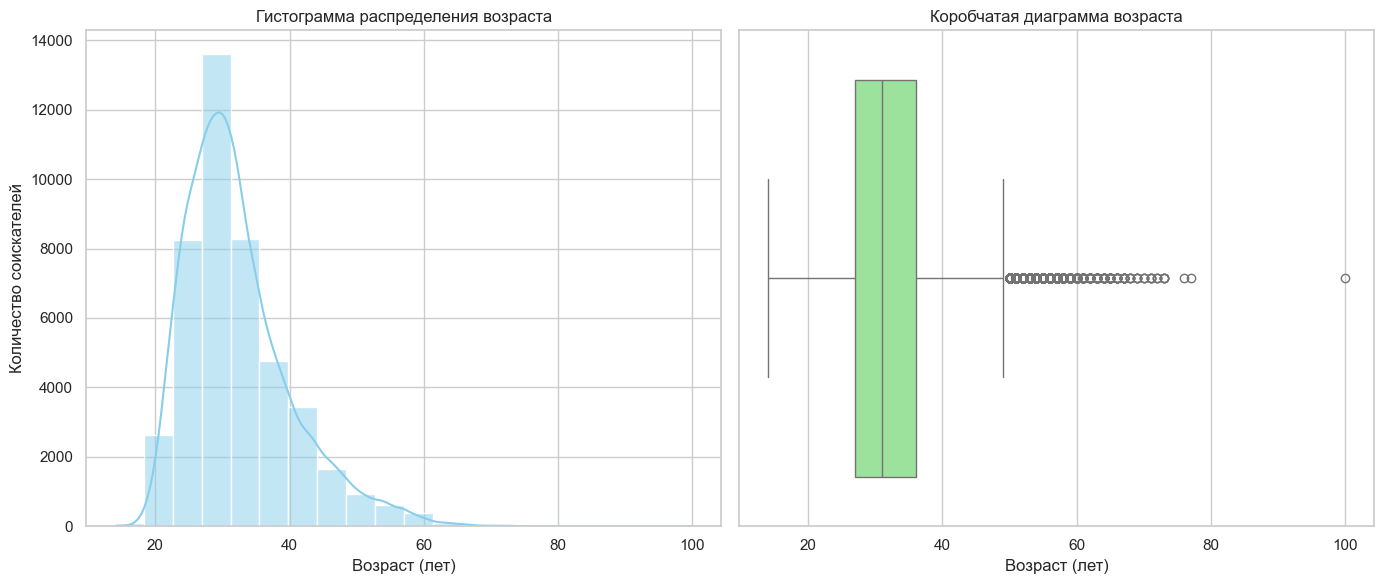

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

# Функция для извлечения возраста
def extract_age(row):
    try:
        # Разделяем строку по символу ', ' и берем вторую часть (возраст)
        parts = row.split(', ')
        age_str = parts[1].strip()  # Извлекаем возраст как строку
        age = int(''.join(filter(str.isdigit, age_str)))  # Извлекаем только цифры из строки возраста
        return age
    except (IndexError, ValueError):
        return None  # Возвращаем None, если формат строки некорректный

# Применяем функцию к столбцу "Пол, возраст" для извлечения возраста
data['Возраст'] = data['Пол, возраст'].apply(extract_age)

# Проверяем количество пропусков после извлечения возраста
print(f"Количество пропусков в столбце 'Возраст': {data['Возраст'].isna().sum()}")

# Удаляем строки с отсутствующим возрастом
data_clean = data.dropna(subset=['Возраст'])

# Преобразуем столбец 'Возраст' к целочисленному типу
data_clean['Возраст'] = data_clean['Возраст'].astype(int)

# Проверяем основные статистики
print("\nОсновные статистики для возраста:")
print(data_clean['Возраст'].describe())

# Нахождение моды, минимального и максимального возраста
mode_age = data_clean['Возраст'].mode()[0]
min_age = data_clean['Возраст'].min()
max_age = data_clean['Возраст'].max()

print(f"\nМода возраста: {mode_age} лет")
print(f"Минимальный возраст: {min_age} лет")
print(f"Максимальный возраст: {max_age} лет")

# Определение интервала большинства соискателей (25-й и 75-й процентиль)
q1 = data_clean['Возраст'].quantile(0.25)
q3 = data_clean['Возраст'].quantile(0.75)
print(f"Интервал большинства соискателей: от {q1} до {q3} лет")

# Выявление аномалий (выбросов) с помощью метода IQR
IQR = q3 - q1
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

anomalies = data_clean[(data_clean['Возраст'] < lower_bound) | (data_clean['Возраст'] > upper_bound)]
print(f"\nКоличество аномалий: {len(anomalies)}")
if not anomalies.empty:
    print(f"Аномальные значения возраста: {anomalies['Возраст'].unique()}")
    
# Визуализация распределения возраста
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Гистограмма распределения возраста
sns.histplot(data_clean['Возраст'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Гистограмма распределения возраста')
axes[0].set_xlabel('Возраст (лет)')
axes[0].set_ylabel('Количество соискателей')

# Коробчатая диаграмма распределения возраста
sns.boxplot(x=data_clean['Возраст'], ax=axes[1], color='lightgreen')
axes[1].set_title('Коробчатая диаграмма возраста')
axes[1].set_xlabel('Возраст (лет)')

plt.tight_layout()
plt.show()


Гистограмма:
-Большинство значений сосредоточено в интервале от 25 до 35 лет, что подтверждается расчетами квартилей.
-Распределение имеет правосторонний хвост (асимметрия), что указывает на наличие старших соискателей.

Коробчатая диаграмма:
-Большинство значений попадает в интервал от 25 до 35 лет, что соответствует основному "телу" коробки.
-Выбросы наблюдаются выше верхней границы усов (например, 65 лет).

Общие выводы:
1. Мода распределения: Чаще всего встречается возраст 30 лет.
2. Интервал большинства: Основная масса соискателей находится в возрасте от 25 до 35 лет.
3. Аномалии: Возраст 65 лет можно считать аномальным для данной выборки.
4. Распределение: Распределение имеет правостороннюю асимметрию из-за наличия старших соискателей.
Эти выводы могут быть полезны для понимания целевой аудитории и принятия решений в области подбора персонала.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [73]:
import numpy as np
import pandas as pd
import re
import plotly.express as px

data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

# Функция для преобразования опыта работы в месяцы
def get_experience(arg):
    if arg is np.nan or arg == 'Не указано':
        return None
    year_words=['год', 'года', 'лет']
    month_words=['месяц', 'месяца', 'месяцев']
    arg_splitted = arg.split(' ')[:7]
    years = 0
    months = 0
    for index, item in enumerate (arg_splitted):
        if item in year_words:
            years = int(arg_splitted[index-1])
        if item in month_words:
            months = int(arg_splitted[index-1])
    return int(years*12 + months)
data['Опыт работы (месяц)'] = data['Опыт работы'].apply(get_experience)

data = data.drop('Опыт работы', axis=1)

max_experience = (round(data['Опыт работы (месяц)'].max()))

# Выводим результат
print(f"Максимальный опыт работы (в месяцах): {max_experience}")

fig = px.histogram(
    data_frame=data,
    x='Опыт работы (месяц)',
    title='Распределение опыта работы соискателей',
    histnorm='percent',
    width=500,
    marginal='box',
)
fig.show()


Максимальный опыт работы (в месяцах): 1188


Гистограмма:
-Распределение опыта работы может быть смещено влево (левосторонняя асимметрия), так как большинство соискателей имеют небольшой опыт работы.
-В данных могут быть выбросы — значения, которые значительно превышают основные группы данных.
Коробчатая диаграмма:
-Коробчатая диаграмма подтверждает наличие выбросов: они отображаются как точки за пределами усов.
-Разброс данных значительный — есть кандидаты как с минимальным опытом (например, 0 месяцев), так и с большим опытом (сотни месяцев).

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [81]:
import pandas as pd
import plotly.express as px

# Загрузка данных
resume_data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')
currency_data = pd.read_csv('data/ExchangeRates.csv')

# Преобразование дат
resume_data['Обновление резюме'] = pd.to_datetime(resume_data['Обновление резюме'], dayfirst=True).dt.date

# Указываем формат даты для currency_data
currency_data['date'] = pd.to_datetime(currency_data['date'], format='%d/%m/%y').dt.date

# Разделение столбца "ЗП" на сумму и валюту
resume_data[['ЗП сумма', 'ЗП валюта']] = resume_data['ЗП'].str.extract(r'([\d\s]+)\s*(\D+)')
resume_data['ЗП сумма'] = resume_data['ЗП сумма'].str.replace(' ', '', regex=True).astype(float)

# Преобразование валют в ISO-коды
currency_mapping = {
    'руб.': 'RUB',
    'USD': 'USD',
    'EUR': 'EUR',
    'KZT': 'KZT',
    'грн.': 'UAH',
    'бел.руб.': 'BYN'
}
resume_data['ЗП валюта'] = resume_data['ЗП валюта'].map(currency_mapping)

# Удаляем строки с пропусками в столбцах "ЗП сумма" или "ЗП валюта"
resume_data.dropna(subset=['ЗП сумма', 'ЗП валюта'], inplace=True)

# Объединение таблиц
merged_data = resume_data.merge(
    currency_data,
    left_on=['Обновление резюме', 'ЗП валюта'],
    right_on=['date', 'currency'],
    how='left'
)

# Заполнение курса для рубля (курс равен 1)
merged_data.loc[merged_data['ЗП валюта'] == 'RUB', ['close', 'proportion']] = [1, 1]

# Удаляем строки с пропусками в столбцах "close" или "proportion"
merged_data.dropna(subset=['close', 'proportion'], inplace=True)

# Перевод зарплаты в рубли
merged_data['ЗП (руб)'] = (merged_data['ЗП сумма'] * merged_data['close']) / merged_data['proportion']

# Удаляем строки с пропусками в столбце "ЗП (руб)"
merged_data.dropna(subset=['ЗП (руб)'], inplace=True)

# Очистка данных
columns_to_drop = ['ЗП', 'ЗП сумма', 'ЗП валюта', 'currency', 'date', 'close', 'proportion']
merged_data.drop(columns=columns_to_drop, inplace=True)

# Мода
mode_salary = merged_data['ЗП (руб)'].mode()[0]

# Минимум, максимум и IQR
min_salary = merged_data['ЗП (руб)'].min()
max_salary = merged_data['ЗП (руб)'].max()
q1 = merged_data['ЗП (руб)'].quantile(0.25)
q3 = merged_data['ЗП (руб)'].quantile(0.75)
iqr = q3 - q1

# Аномалии
outliers = merged_data[(merged_data['ЗП (руб)'] < lower_bound) | (merged_data['ЗП (руб)'] > upper_bound)]

# Соискатели с зарплатой выше 1 млн руб.
high_salary_count = merged_data[merged_data['ЗП (руб)'] > 1_000_000].shape[0]

# Гистограмма и коробчатая диаграмма
fig = px.histogram(
    data_frame=merged_data,
    x='ЗП (руб)',
    title='Распределение желаемой з/п соискателей',
    histnorm='percent',
    width=500,
    marginal='box'
)
fig.show()

# Вывод результатов
print(f"Мода распределения: {mode_salary} руб.")
print(f"Минимальная заработная плата: {min_salary} руб.")
print(f"Максимальная заработная плата: {max_salary} руб.")
print(f"Количество соискателей с зарплатой выше 1 млн руб.: {high_salary_count}")


Мода распределения: 50000.0 руб.
Минимальная заработная плата: 1.0 руб.
Максимальная заработная плата: 24304876.0 руб.
Количество соискателей с зарплатой выше 1 млн руб.: 5


ваши выводы здесь

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [89]:
import pandas as pd
import plotly.express as px

# Загрузка данных
resume_data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')
currency_data = pd.read_csv('data/ExchangeRates.csv')

# Преобразование дат
resume_data['Обновление резюме'] = pd.to_datetime(resume_data['Обновление резюме'], dayfirst=True).dt.date

# Указываем формат даты для currency_data
currency_data['date'] = pd.to_datetime(currency_data['date'], format='%d/%m/%y').dt.date

# Разделение столбца "ЗП" на сумму и валюту
resume_data[['ЗП сумма', 'ЗП валюта']] = resume_data['ЗП'].str.extract(r'([\d\s]+)\s*(\D+)')
resume_data['ЗП сумма'] = resume_data['ЗП сумма'].str.replace(' ', '', regex=True).astype(float)

# Преобразование валют в ISO-коды
currency_mapping = {
    'руб.': 'RUB',
    'USD': 'USD',
    'EUR': 'EUR',
    'KZT': 'KZT',
    'грн.': 'UAH',
    'бел.руб.': 'BYN'
}
resume_data['ЗП валюта'] = resume_data['ЗП валюта'].map(currency_mapping)

# Удаляем строки с пропусками в столбцах "ЗП сумма" или "ЗП валюта"
resume_data.dropna(subset=['ЗП сумма', 'ЗП валюта'], inplace=True)

# Объединение таблиц
merged_data = resume_data.merge(
    currency_data,
    left_on=['Обновление резюме', 'ЗП валюта'],
    right_on=['date', 'currency'],
    how='left'
)

# Заполнение курса для рубля (курс равен 1)
merged_data.loc[merged_data['ЗП валюта'] == 'RUB', ['close', 'proportion']] = [1, 1]

# Удаляем строки с пропусками в столбцах "close" или "proportion"
merged_data.dropna(subset=['close', 'proportion'], inplace=True)

# Перевод зарплаты в рубли
merged_data['ЗП (руб)'] = (merged_data['ЗП сумма'] * merged_data['close']) / merged_data['proportion']

# Удаляем строки с пропусками в столбце "ЗП (руб)"
merged_data.dropna(subset=['ЗП (руб)'], inplace=True)

# Очистка данных
columns_to_drop = ['ЗП', 'ЗП сумма', 'ЗП валюта', 'currency', 'date', 'close', 'proportion']
merged_data.drop(columns=columns_to_drop, inplace=True)

# Извлекаем только уровень образования из столбца 'Образование и ВУЗ'
    # Например, если в данных есть "Высшее (МГУ)", оставляем только "Высшее"
filtered_data['Уровень образования'] = filtered_data['Образование и ВУЗ'].str.extract(r'(Высшее|Среднее специальное|Среднее|Неоконченное высшее)', expand=False)

# Удаляем строки с пропусками после извлечения уровня образования
filtered_data.dropna(subset=['Уровень образования'], inplace=True)

# Группировка данных по уровню образования и расчет медианной зарплаты
median_salary_by_education = filtered_data.groupby('Уровень образования', as_index=False)['ЗП (руб)'].median()

# Сортировка данных по уровню образования для более логичного отображения
education_order = ['Среднее', 'Среднее специальное', 'Неоконченное высшее', 'Высшее']
median_salary_by_education['Уровень образования'] = pd.Categorical(
    median_salary_by_education['Уровень образования'],
    categories=education_order,
    ordered=True
)
median_salary_by_education.sort_values('Уровень образования', inplace=True)

# Построение диаграммы
fig = px.bar(
    median_salary_by_education,
    x='Уровень образования',
    y='ЗП (руб)',
    title='Медианная желаемая заработная плата по уровню образования',
    labels={'ЗП (руб)': 'Медианная зарплата (руб)', 'Уровень образования': 'Уровень образования'},
    text='ЗП (руб)'
)

# Настройка внешнего вида диаграммы
fig.update_traces(texttemplate='%{text:.0f}', textposition='outside')  # Округляем зарплату до целого числа
fig.update_layout(
    xaxis_title='Уровень образования',
    yaxis_title='Медианная зарплата (руб)',
    showlegend=False,
    xaxis=dict(tickangle=-45)  # Поворачиваем подписи на оси X
)

# Отображение диаграммы
fig.show()

ваши выводы здесь

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [ ]:
# ваш код здесь

ваши выводы здесь

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [ ]:
# ваш код здесь

In [ ]:
ваши выводы здесь

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [ ]:
# ваш код здесь

ваши выводы здесь

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [ ]:
# ваш код здесь

ваши выводы здесь

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [ ]:
# ваш код здесь

ваши выводы здесь

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [95]:
import pandas as pd

# Загрузка данных из CSV-файла
data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

duplicates = data[data.duplicated(subset=data.columns)]

datadata_cleaned = data.drop_duplicates()

print(f"Полных дубликатов найдено: {duplicates.shape[0]}")

# Проверка, что дубликаты удалены
print(f"Количество строк после удаления дубликатов: {len(data_cleaned)}")

# Сохранение очищенных данных в новый файл (если нужно)
data_cleaned.to_csv('data/cleaned_hh_database.csv', sep=';', index=False)

Полных дубликатов найдено: 153
Количество строк после удаления дубликатов: 44591


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [ ]:
import pandas as pd
import re

# Загрузка данных
data = pd.read_csv('data/cleaned_hh_database.csv', sep=';')

# Проверка пропусков в каждом столбце
missing_values = data.isnull().sum()

# Вывод количества пропусков по каждому столбцу
print(missing_values)

Пол, возраст                         0
ЗП                                   0
Ищет работу на должность:            0
Город, переезд, командировки         0
Занятость                            0
График                               0
Опыт работы                        166
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Образование и ВУЗ                    0
Обновление резюме                    0
Авто                                 0
dtype: int64


3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [ ]:
# ваш код здесь

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [12]:
# ваш код здесь

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

In [ ]:
# ваш код здесь

ваш коммментарий здесь